In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_excel('diamonds 2.xlsx',index_col=0)
print(df.head())
print(f'Duplicates= {df.duplicated().sum()}')
print(df.isnull().sum())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Duplicates= 153
carat      0
cut        3
color      1
clarity    0
depth      1
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [5]:
df = df.dropna()
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
print(f'Duplicates= {df.duplicated().sum()}')
for col in df.select_dtypes(include='object').columns:
    if df[col].apply(lambda x: isinstance(x, str)).all():
        df[col] = df[col].str.strip().str.title()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Duplicates= 0


In [6]:
#some data cleaning
print(df['price'].min())
df = df[df['price'] >= 0]
print(df['price'].min())

df['clarity'].value_counts()
df = df[df['clarity'] != '7Y']

-200
326


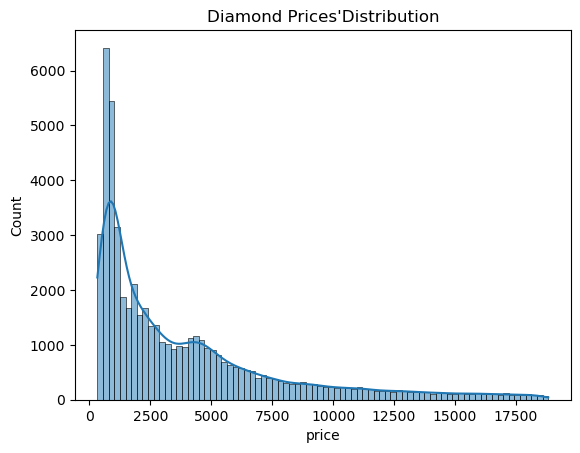

C:\Users\ahmed\AppData\Local\Temp\ipykernel_25832\2378139173.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cut', data=df,color='green', alpha=0.7, palette='deep')


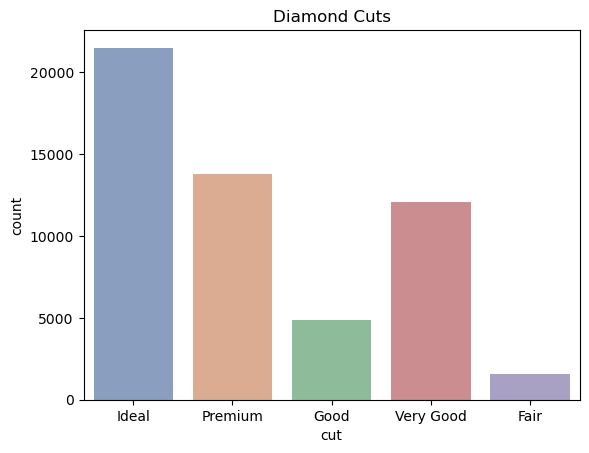

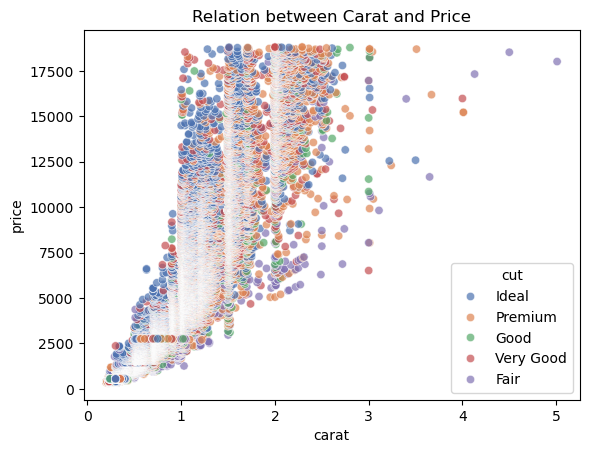

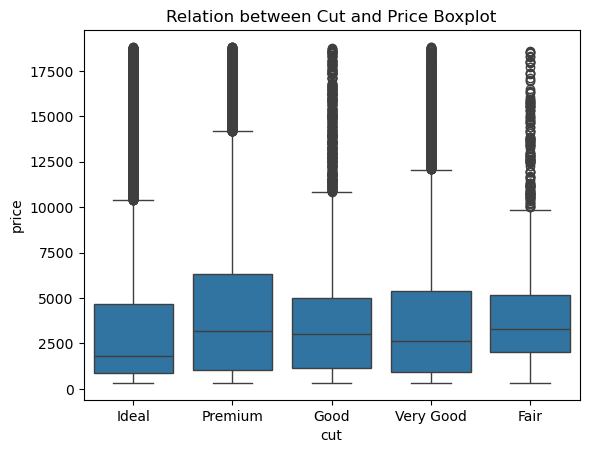

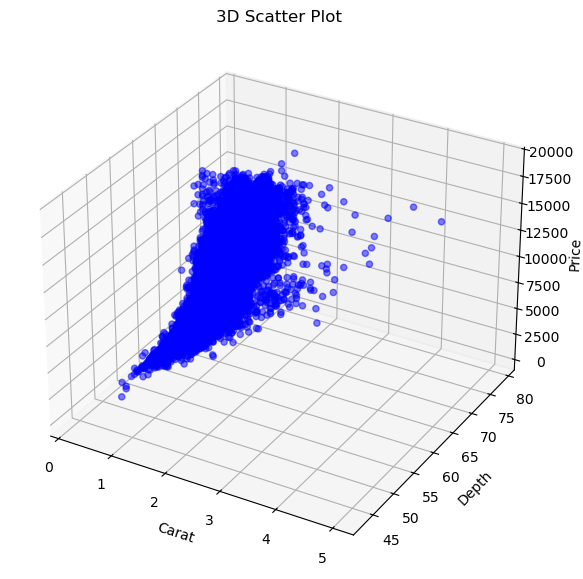

In [7]:
#1D (PRICE):-
sns.histplot(df['price'], kde=True)
plt.title("Diamond Prices'Distribution")
plt.show()

#1D (CUT):-
sns.countplot(x='cut', data=df,color='green', alpha=0.7, palette='deep')
plt.title('Diamond Cuts')
plt.show()

#2D (carat and price):-
sns.scatterplot(x='carat', y='price', data=df,palette='deep', alpha=0.7,hue='cut')
plt.title('Relation between Carat and Price')
plt.show()

#2D (cut and price):-
sns.boxplot(x='cut', y='price', data=df)
plt.title('Relation between Cut and Price Boxplot')
plt.show()
#3D: Carat,Depth,and Price
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['carat'], df['depth'], df['price'], c='blue', alpha=0.5)
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
plt.title('3D Scatter Plot')
plt.show()

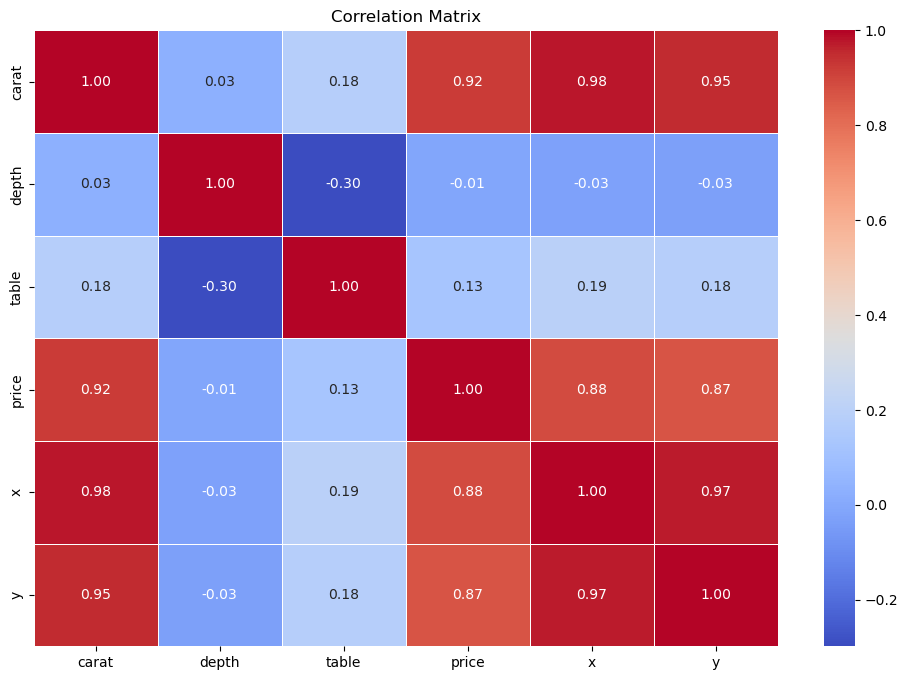

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [9]:
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
df['cut_encoded'] = df['cut'].map(cut_mapping)

clarity_mapping = {
    'I1': 0,
    'Si2': 1,
    'Si1': 2,
    'Vs2': 3,
    'Vs1': 4,
    'Vvs2': 5,
    'Vvs1': 6,
    'If': 7
}
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

df = pd.get_dummies(df, columns=['color'], drop_first=True, dtype=int)

print(df.head())



   carat      cut clarity  depth  table  price     x     y     z  cut_encoded  \
0   0.23    Ideal     SI2   61.5   55.0    326  3.95  3.98  2.43            4   
1   0.21  Premium     SI1   59.8   61.0    326  3.89  3.84  2.31            3   
2   0.23     Good     VS1   56.9   65.0    327  4.05  4.07  2.31            1   
3   0.29  Premium     VS2   62.4   58.0    334  4.20  4.23  2.63            3   
4   0.31     Good     SI2   63.3   58.0    335  4.34  4.35  2.75            1   

   clarity_encoded  color_D  color_E  color_F  color_G  color_H  color_I  \
0              NaN        0        1        0        0        0        0   
1              NaN        0        1        0        0        0        0   
2              NaN        0        1        0        0        0        0   
3              NaN        0        0        0        0        0        1   
4              NaN        0        0        0        0        0        0   

   color_J  
0        0  
1        0  
2        0  
3   

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)
# I discoverd Z is not numeric so I will make it numeric
df['z'] = df['z'].astype(str).str.replace('[^\d.]', '', regex=True)
df['z'] = pd.to_numeric(df['z'], errors='coerce')

numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns after conversion:", numeric_cols)


Numeric columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'cut_encoded',
       'clarity_encoded', 'color_D', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J'],
      dtype='object')
Numeric columns after conversion: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_encoded',
       'clarity_encoded', 'color_D', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J'],
      dtype='object')


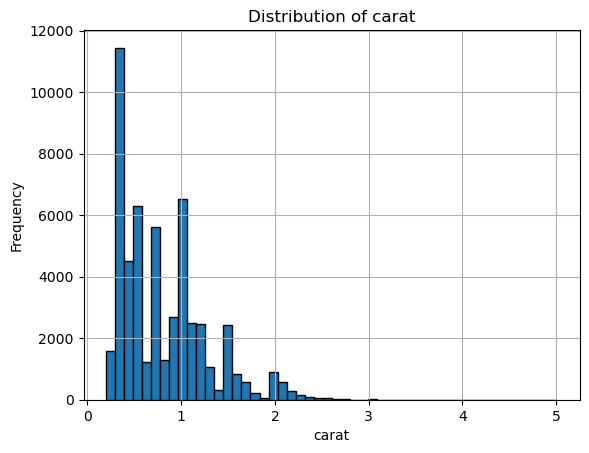

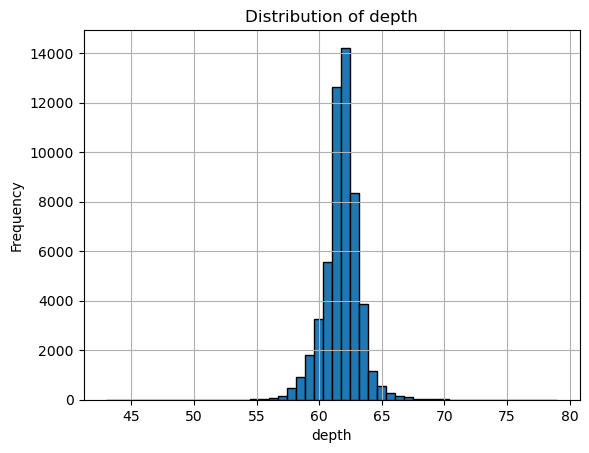

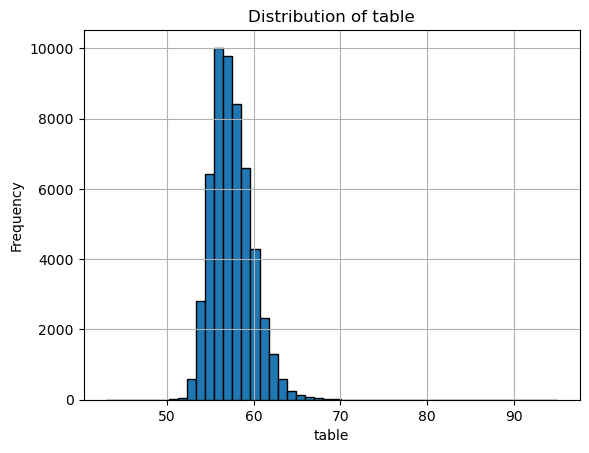

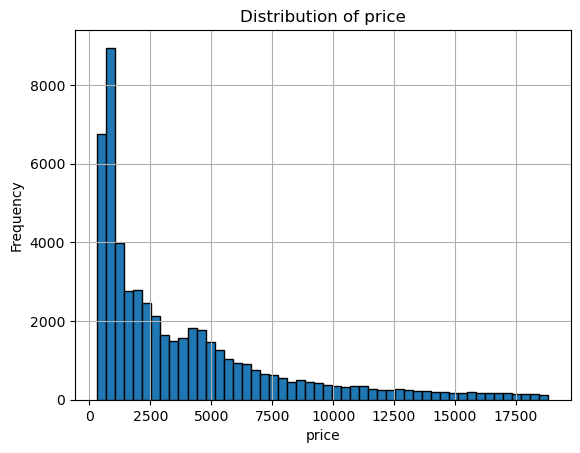

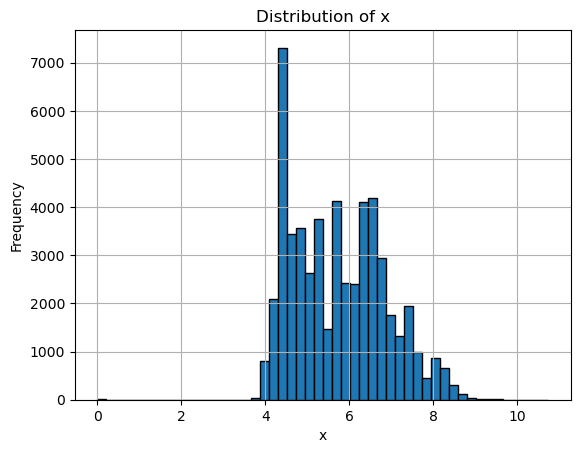

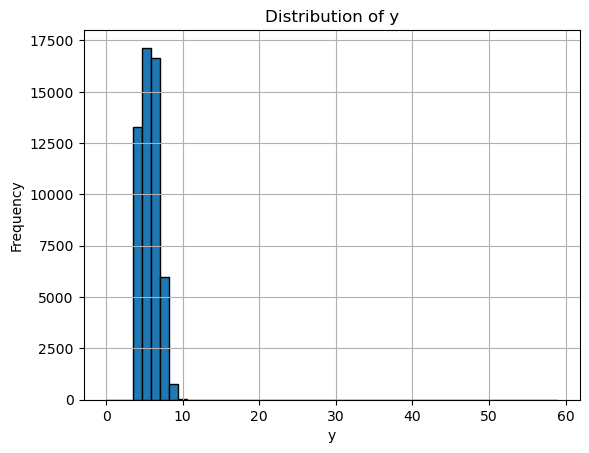

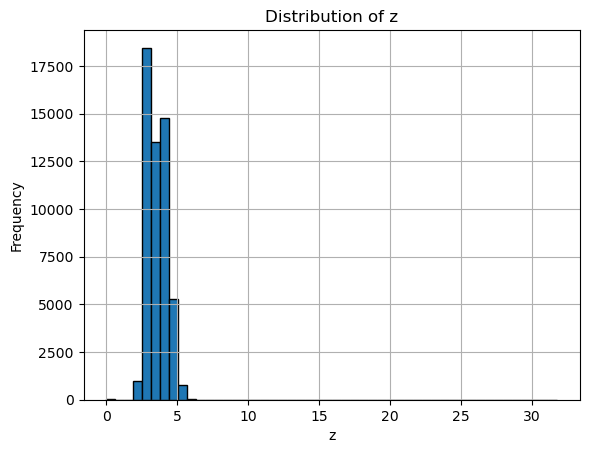

In [11]:
# this is to know which type of scaling to use
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure()
    plt.hist(df[col].dropna(), bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
import numpy as np

# PowerTransform for 'carat'
pt = PowerTransformer(method='yeo-johnson')
df['carat_scaled'] = pt.fit_transform(df[['carat']])

# StandardScaler for 'depth' and 'table'
scaler_std = StandardScaler()
df[['depth_scaled', 'table_scaled']] = scaler_std.fit_transform(df[['depth', 'table']])

# Log Transform + StandardScaler for 'price'
df['price_log'] = np.log1p(df['price'])  # log1p to handle zeros safely
df['price_scaled'] = StandardScaler().fit_transform(df[['price_log']])

# Optional: Dropping 'price_log' as it is not needed
df.drop(columns=['price_log'], inplace=True)


print(df[['carat_scaled', 'depth_scaled', 'table_scaled', 'price_scaled']].head())


   carat_scaled  depth_scaled  table_scaled  price_scaled
0     -1.707197     -0.173469     -1.100478     -1.970333
1     -1.816234     -1.362457      1.585665     -1.970333
2     -1.707197     -3.390731      3.376428     -1.967322
3     -1.402774      0.455995      0.242593     -1.946495
4     -1.308240      1.085460      0.242593     -1.943556
